# Lab 2: UWave

Julian Lapenna

96953443

Oct 10, 15:44

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Starting the lab. 

If I need to adjust the depth:

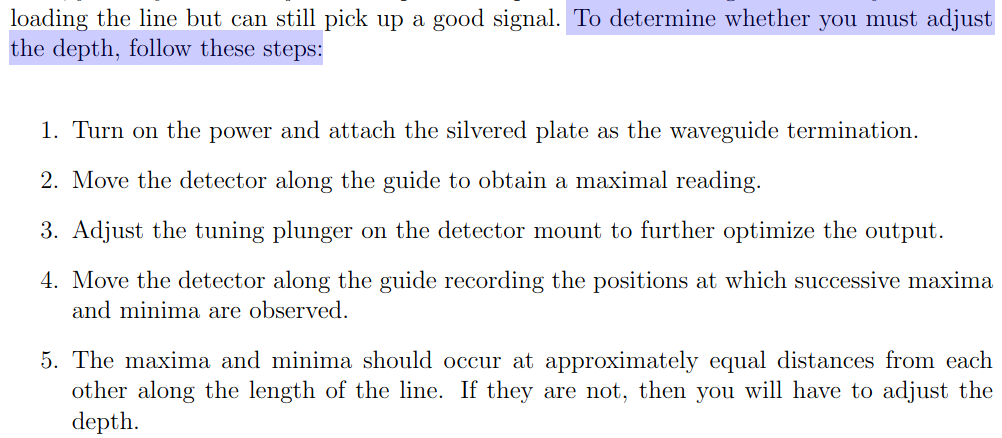

In the equpiment settings page (paper under the apparatus) it shows a a wave with y axis of mV and x axis of cm. This means, the sensor will detect the time average (mean value over time) of the signal it reads, i.e., for a sine wave and report this as a DC value into the grey box connected. What I will be looking at is how this DC value changes as I either shift the measurement device or change the end conditions of the wave.

I will try to recreate each of the plots on the parameters set up sheet (same as equipement settings page). I will put the values at the top as the settings for the function generator and try to read values on the multimeter matching the graph.

I have set my function generator to output a continuous wave (CW) with voltage $V=8.005\textrm{V}$ and current $I=0.068\textrm{A}$.

I can read a  minima at around $8.8$ cm, but then the next maxima comes at $9.95$ cm which isn't in line with the parameters set up sheet.

Return to the depth adjustment steps:
* Maxima at $9.95$ mm
* Adjusted the rod above to get a maximum reading of $152$ mV
* Adjusted x position to get minima at $10.37$ cm with reading of $0.03$ mV
* Adjusted x position to get maxima at $11.55$ cm with reading of $158$ mV

In [1]:
print((11.55+9.95)/2)

10.75


Not in the middle so I need to try again:
* I adjusted the rod to increase the maximum again at distance $11.55$ cm
* Min at $12.04$ cm
* Max at $13.10$ cm... not equispaced again
* Min at $13.71$ cm
* Max at $14.71$ cm
* Min at $15.39$ cm

Text(0.5, 1.0, 'data points while adjusting the waveguide by hand')

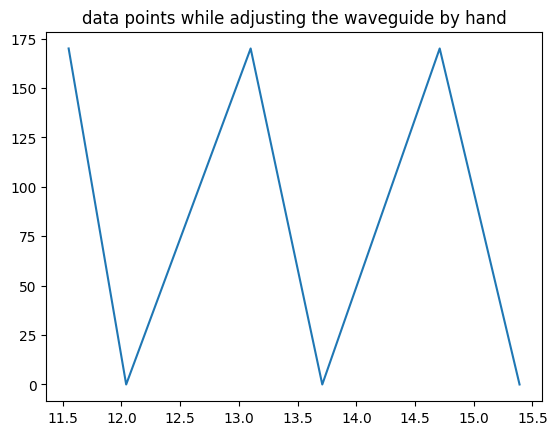

In [3]:
x = np.array([11.55, 12.04, 13.10, 13.71, 14.71, 15.39])
y = np.array([170, 0, 170, 0, 170, 0])

plt.plot(x,y)
plt.title('data points while adjusting the waveguide by hand')

Ah, so I misunderstood before, the peaks should be equispaced, and the valleys should be equispaced, but the peaks won't necessarily be equispaced between the valleys.

I have now set the micrometer to 4.165 mm.

## Micrometer set to 4.165 mm for best performance

Checking max and min points:

Maxes: 9.81, 11.47, 13.15

Mins: 8.73, 10.41, 12.07

each are read from the digital readout scale and have uncertainty of 0.005 cm.

In [1]:
print('max in middle at', (13.15 + 9.81)/2)
print('min in middle at', (12.07 + 8.73)/2)

print(f'the distance between the peaks is {(13.15 - 11.47):.2f} and {(-9.81 + 11.47):.2f}')
print(f'the distance between the valleys is {(10.41 - 8.73):.2f} and {(12.07 - 10.41):.2f}')

max in middle at 11.48
min in middle at 10.4
the distance between the peaks is 1.68 and 1.66
the distance between the valleys is 1.68 and 1.66


Great, that almost perfectly matches!

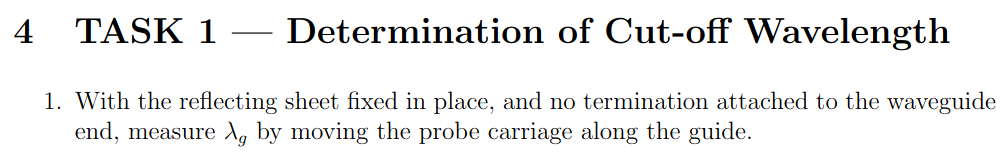

For tasks 1.1:
* Reflection plate is pressed up as close to the base of the apparatus and the distance is set to $-24.01\textrm{mm}$. Now to find two subsequent peaks/valleys.

So from the previous part, the wave length $\lambda_g = 2*1.67 = 3.34 \textrm{cm}$ after averaging the distances between peaks and valleys in each case and multiplying by 2 because it's a standing wave. Granted that's only a sample size of 4, but they seem to agree pretty closely (as in within 0.01 cm)!

## Summary: Solving for $\lambda_g = 3.34\textrm{cm}$

* micrometer = $4.165 \pm 0.0005 \textrm{mm}$
* power supply at $7.993 \pm 0.0005 \textrm{V}$ and $0.067 \pm 0.0005 \textrm{A}$
* measurements indicate there is a distance of $1.67 \pm 0.005 \textrm{cm}$ between subsequent peaks
* multiply that value by 2 because we have a standing wave to get the full wavelength
* $\lambda_g = 3.34\textrm{cm}$

In [10]:
lambda_g = 3.34

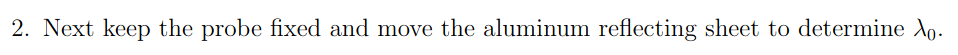

Next task, similar, but move the aluminum sheet. I start by finding a maximum point of 76.3 mV. Now I vary the aluminum sheet (initially -24.01 +- 0.005 mm) and record below.

The variations were only around 3 mV, this seems like very little so I tried adjusting the probe to a minimum and varying the aluminum sheet and I got similar results. I think it doesn't go all the way to 0 mV because there is a drastic change from waveguide to free space.

I might try using the horn transition guide next lab, but for now, I think the drastic change is causing a change in the index of refraction which results in lots of reflection at the boundary and only a little bit is getting reflected from the aluminum sheet.

Data to be acquired next time...

# 2nd session

Oct 17, 15:41

Lab topic for today: 

### Solving for $\lambda_0$ 

by keeping the probe fixed and moving the reflecting aluminum sheet.

Previously there were very small variations.

I also reviewed my calculations and fixed a factor of two that was missing previously.

Params on start:

* micrometer = $4.165 \pm 0.0005\ \textrm{mm}$
* PSU voltage at $7.999 \pm 0.0005\ \textrm{V}$ 
* PSU current at $0.068 \pm 0.0005\ \textrm{A}$
* Probe at position $15.97 \pm 0.005\ \textrm{mm}$ (maximum position from moving prob to get highest resolution)
* Probe reading of $80.1 \pm 0.5\ \textrm{mV}$

**To find:** Positions of the aluminum sheet that give maxima or minima.

In [6]:
max_distances = [3.04, 16.16, 29.80] # in [mm]
min_distances = [9.01, 22.16, 36,27] # in [mm]

diffs = [
    max_distances[1] - max_distances[0],
    max_distances[2] - max_distances[1],
    min_distances[1] - min_distances[0],
    min_distances[2] - min_distances[1]
    ]

print(f'the distance between the peaks is {(diffs[0]):.2f} and {(diffs[1]):.2f}')
print(f'the distance between the valleys is {(diffs[2]):.2f} and {(diffs[3]):.2f}')

the distance between the peaks is 13.12 and 13.64
the distance between the valleys is 13.15 and 13.84


These values were found with minima having a (fluctating) voltage of $78.1 \pm 0.5\ \textrm{V}$ and maxima of $81.6 \pm 0.5\ \textrm{V}$. I found this by inspection, i.e., visually watching the DAQ probe value readout.

Changing units to $\textrm{cm}$, multiplying by 2 for standing wave, and then averaging the 4 reads I get:

In [9]:
MM_TO_CM = 1/10
lambda_0 = np.sum(diffs) / len(diffs) * MM_TO_CM * 2

print(lambda_0)

2.6875


### $\lambda_0 = 2.69 \textrm{cm}$

Uncertainty measurements are all included above and will be propagated and summarized later.

Observations:
- $\lambda_g > \lambda_0$
- both are pretty small, but then again, I don't know how big they should be since this is my first time working with physical waveguides

### Part 4.3

Measuring the waveguide w calipers

$a = 23.45 \pm 0.005 \textrm{mm}$\
$b = 10.16 \pm 0.005 \textrm{mm}$

Now I will use this to calculate $\lambda_c$ in two different ways.

First way: 

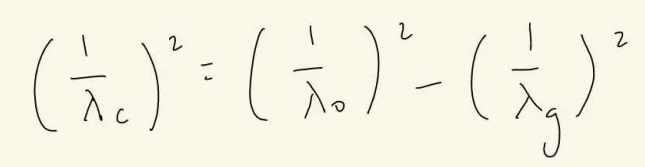

Rearranging this equation, we get $\lambda_c = \frac{1}{\sqrt{(1/\lambda_0)^2-(1/\lambda_g)^2}}$

In [11]:
lambda_c = 1/np.sqrt((1/lambda_0)**2 - (1/lambda_g)**2)
lambda_c

4.5262243031971074

### Method 1: $\lambda_c = 4.53\ \textrm{cm}$

Second way: 

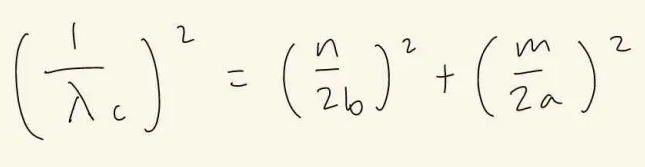

and here we only care about $ m = 1 $ and $ n = 0 $ because in the lab text it explains:

> In the present experiment, since $b < a$, the cutoff frequencies for all modes other than the first mode ($TE_{10}$) are higher than the frequencies available from the source

So this is pretty easy to compute, it simplifies to $\lambda_c = 2a$

In [12]:
a = 2.345 # in [cm]
lambda_c2 = 2*a
lambda_c2

4.69

### Method 2: $\lambda_c = 4.69\ \textrm{cm}$

That seems pretty close, how far apart are they?

In [13]:
error = np.abs(lambda_c2 - lambda_c) / max(lambda_c, lambda_c2)
error

0.03492019121596864

Not bad, about 3.5% error. I consider that to be quite accurate, at least for my first lab of this style.

# Section 5: Task 2 Impedance measurement